# Time Series - ARIMA

### What does `statsmodels` include?

"statsmodels" is a comprehensive Python package for statistical modeling and econometrics, offering features such as:

+ Linear regression, generalized linear models (GLM), and Bayesian regression

+ Time series models: AR, MA, ARIMA, SARIMA, VAR, GARCH

+ Descriptive statistics and statistical hypothesis testing

+ Tools for autocorrelation analysis: ACF, PACF, and stationarity tests like the Dickey-Fuller test




### Main Differences: `statsmodels` vs `scikit-learn` in Linear Regression

| Feature               | statsmodels                                                  | scikit-learn                          |
|:----------------------|:-------------------------------------------------------------|:---------------------------------------|
| 🎯 Purpose            | Statistical analysis, inference, interpretation              | Machine learning, prediction           |
| 🧾 Output             | Detailed stats (p-value, adjusted R², SE, CI, t, F)           | Only prediction result and R²          |
| 🔍 Model              | Classical statistics (OLS, GLM, etc.)                        | Purely algorithmic                     |
| 🧠 Bayesian Regression | Available (e.g., `BayesMixedGLM`)                           | Not built-in                           |
| 📊 Statistical Tests  | Yes: t-test, F-test, AIC, BIC, p-values                       | No (must be added manually)            |
| 💡 Explainability     | Strong (p-values, confidence intervals, diagnostics)          | Weaker (no p-values, SE, etc.)         |


### Import the libraries:

In [387]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

### **AR(p)** models:

### **Example 1:** $X_t = 0.3X_{t-1} + 0.2X_{t-2} - 0.6 + \varepsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.


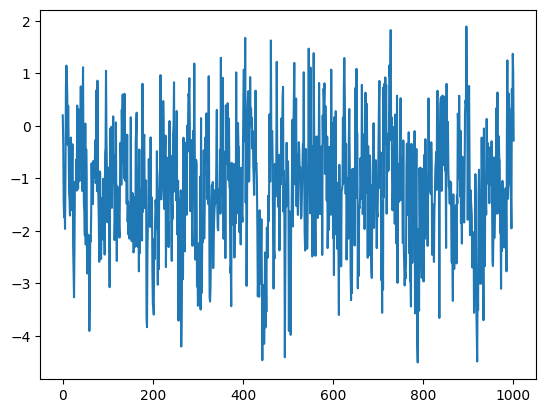

<Figure size 1000x600 with 0 Axes>

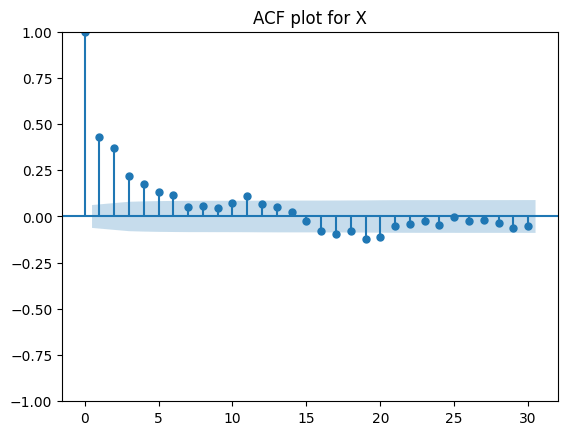

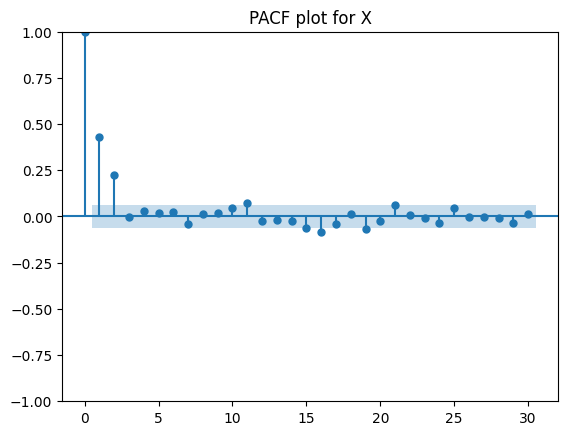

In [388]:
X = [0.2, -0.3]
for i in range(1000):
    X.append(0.3 * X[-1] + 0.2 * X[-2] - 0.6 + np.random.normal(0, 1, 1)[0])

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=30, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [389]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=2)  # model AR(2)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

forecast_ar = model_ar_fit.predict(start=len(data), end=len(data)+4)  # prediction
print(forecast_ar)

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1002
Model:                     AutoReg(2)   Log Likelihood               -1413.843
Method:               Conditional MLE   S.D. of innovations              0.995
Date:                Thu, 19 Jun 2025   AIC                           2835.687
Time:                        19:26:23   BIC                           2855.318
Sample:                             2   HQIC                          2843.148
                                 1002                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5254      0.050    -10.419      0.000      -0.624      -0.427
y.L1           0.3342      0.031     10.853      0.000       0.274       0.395
y.L2           0.2280      0.031      7.396      0.0

### Conclusions:

The model coefficients are **statistically significant**, since their **𝑝-values < 0.05**, which means we do not reject the null hypothesis - we conclude that both lags `L1` and `L2` have a meaningful impact on the dependent variable.

Regarding **oscillations**, there are **no complex** roots in the characteristic equation, so we do not observe any cyclic or oscillatory behavior in the process.

The model also satisfies the **condition of stationarity** (i.e., stability) because both roots have **moduli greater than 1** (1.68 and 3.38), which ensures the process does not explode over time and that its statistical properties remain constant.

### Now we substitute an incorrect value from the PACF plot -> 3:

In [390]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=3)  # model AR(3)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1002
Model:                     AutoReg(3)   Log Likelihood               -1412.555
Method:               Conditional MLE   S.D. of innovations              0.995
Date:                Thu, 19 Jun 2025   AIC                           2835.110
Time:                        19:26:24   BIC                           2859.644
Sample:                             3   HQIC                          2844.435
                                 1002                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5250      0.053     -9.860      0.000      -0.629      -0.421
y.L1           0.3351      0.032     10.596      0.000       0.273       0.397
y.L2           0.2299      0.033      7.057      0.0

### Conclusions:

The new model coefficient is **not statistically significant**, their **𝑝-values > 0.05**, which means we do reject the null hypothesis - we conclude that lags `L3` have not a meaningful impact on the dependent variable.

### **Example 2:** $X_t = -0.6X_{t-1} + 0.2X_{t-4} + 0.1 + \varepsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

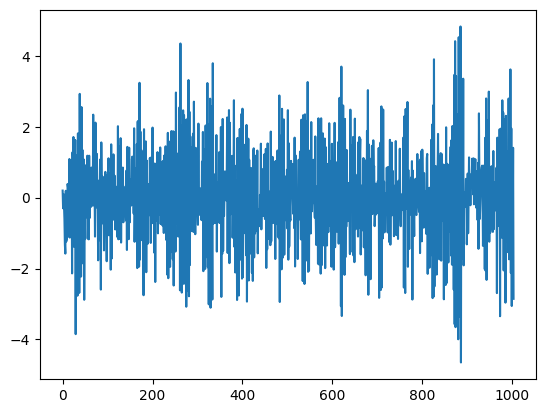

<Figure size 1000x600 with 0 Axes>

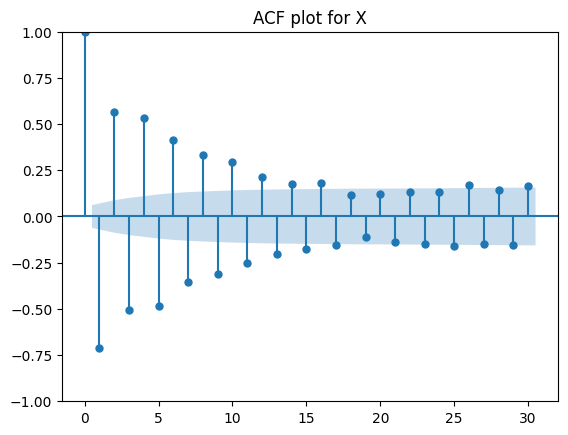

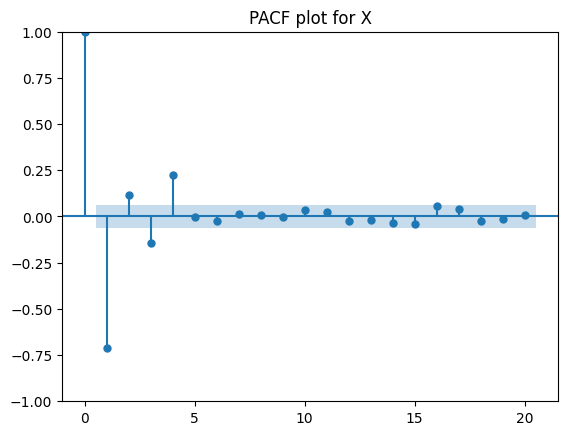

In [391]:
X = [0.2, -0.3, 0.1, -0.2]
for i in range(1000):
    X.append(-0.6 * X[-1] + 0.2 * X[-4] + 0.1 + np.random.normal(0, 1, 1)[0])

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [392]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=4)  # model AR(4)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1004
Model:                     AutoReg(4)   Log Likelihood               -1388.397
Method:               Conditional MLE   S.D. of innovations              0.970
Date:                Thu, 19 Jun 2025   AIC                           2788.794
Time:                        19:26:24   BIC                           2818.241
Sample:                             4   HQIC                          2799.986
                                 1004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0434      0.031      1.407      0.160      -0.017       0.104
y.L1          -0.5817      0.031    -18.842      0.000      -0.642      -0.521
y.L2           0.0198      0.036      0.552      0.5

### Conclusions:

In this model, the coefficients for lags `L2` and `L3` are not statistically significant, since their p-values > 0.05, which means we fail to reject the null hypothesis — we conclude that these lags do not have a meaningful impact on the dependent variable. On the other hand, the constant, lag `L1`, and lag `L4` are statistically significant (p-values < 0.05), indicating that they do contribute significantly to explaining the variation in the dependent variable.

### **MA(q)** models:

### $X_t = 0.4 \epsilon_{t-1} - 0.6 \epsilon_{t-3} + 1 + \epsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

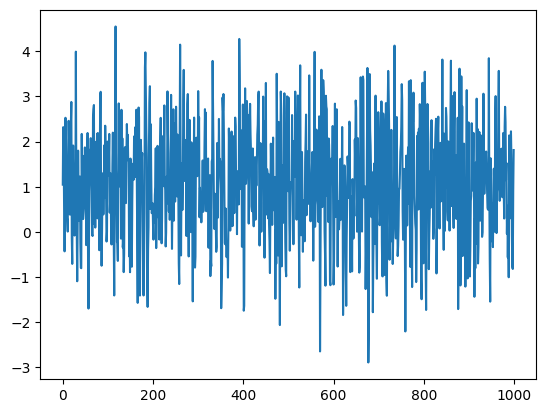

<Figure size 1000x600 with 0 Axes>

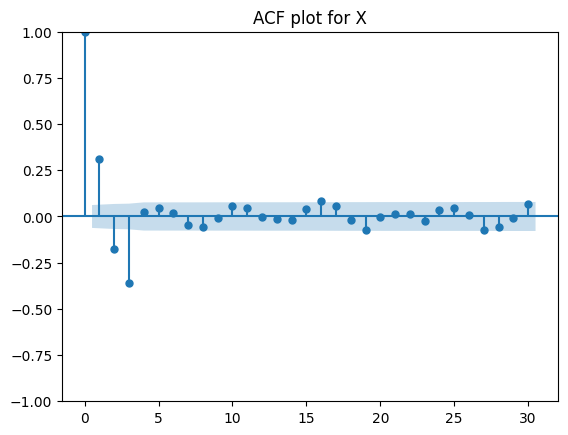

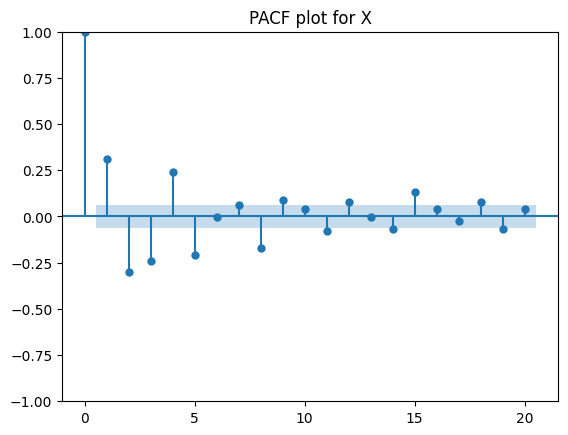

In [393]:
eps = [
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0]
]

X = []

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.4 * eps[-1] - 0.6 * eps[-3] + 1 + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [394]:
from statsmodels.tsa.arima.model import ARIMA

data = pd.Series(X)


model_ma = ARIMA(data, order=(0, 0, 3)) # model ARIMA(p,d,q)
model_ma_fit = model_ma.fit()
print(model_ma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1398.392
Date:                Thu, 19 Jun 2025   AIC                           2806.785
Time:                        19:26:25   BIC                           2831.323
Sample:                             0   HQIC                          2816.111
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0687      0.030     35.218      0.000       1.009       1.128
ma.L1          0.4838      0.027     17.618      0.000       0.430       0.538
ma.L2          0.0508      0.032      1.577      0.1

### Conclusions:

As with the construction of an AR model, in the MA (Moving Average) model, an additional parameter called `sigma2` appears, which represents the variance of the error term; it measures the unexplained randomness in the model, and the smaller the value of `sigma2`, the better the model fit.

### **ARMA(p,q)** models:

### $X_t = 0.4 X_{t-1} + 0.5 \epsilon_{t-1} - 0.6 \epsilon_{t-3} + 1 + \epsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

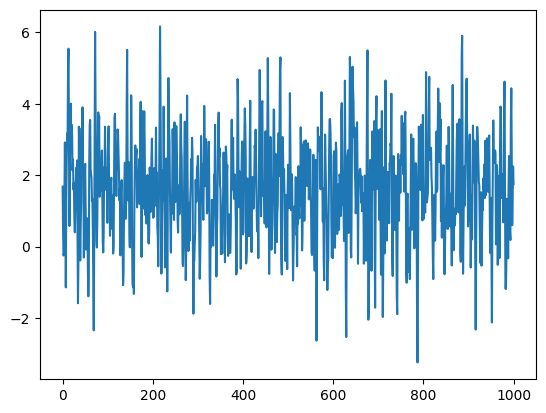

<Figure size 1000x600 with 0 Axes>

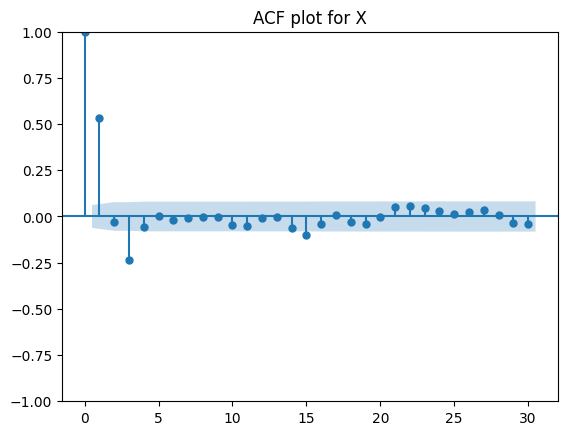

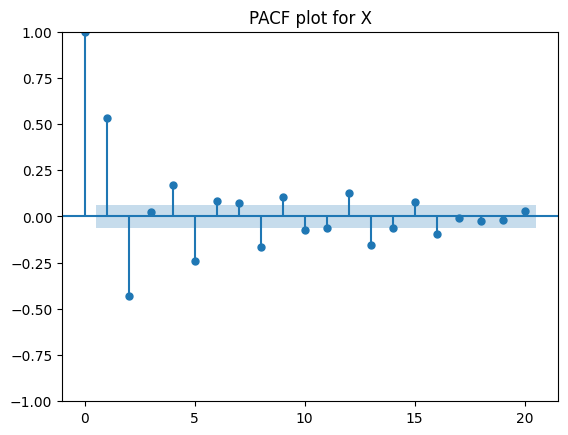

In [395]:
eps = [
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0]
]

X = [1.68]

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.4 * X[-1] + 0.5 * eps[-1] - 0.6 * eps[-3] + 1 + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [396]:
data = pd.Series(X)

model_arma = ARIMA(data, order=(1, 0, 3)) # Model ARIMA(p,d,q)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1001
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1405.230
Date:                Thu, 19 Jun 2025   AIC                           2822.459
Time:                        19:26:26   BIC                           2851.912
Sample:                             0   HQIC                          2833.653
                               - 1001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6112      0.051     31.787      0.000       1.512       1.711
ar.L1          0.3507      0.088      3.990      0.000       0.178       0.523
ma.L1          0.5277      0.076      6.935      0.0

In [397]:
data = pd.Series(X)

model_arma = ARIMA(data, order=(1, 0, 4)) # Model ARIMA(p,d,q)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1001
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -1400.901
Date:                Thu, 19 Jun 2025   AIC                           2815.801
Time:                        19:26:27   BIC                           2850.163
Sample:                             0   HQIC                          2828.860
                               - 1001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6112      0.054     29.610      0.000       1.505       1.718
ar.L1         -0.3782      0.160     -2.365      0.018      -0.692      -0.065
ma.L1          1.2718      0.155      8.206      0.0

In [398]:
model = ARIMA(data, order=(1, 0, 3))
model_fit = model.fit()

forecast_object = model_fit.get_forecast(steps=5)   # Forecasting

forecast = forecast_object.predicted_mean   # Expected Value (Mean)
conf_int = forecast_object.conf_int(alpha=0.05)     # Confidence Interval Values

print("Forecasted values:\n", forecast)
print("\nConfidence intervals:\n", conf_int)

Forecasted values:
 1001    1.413835
1002    1.476452
1003    1.595848
1004    1.605833
1005    1.609335
Name: predicted_mean, dtype: float64

Confidence intervals:
        lower y   upper y
1001 -0.514372  3.342043
1002 -1.090064  4.042968
1003 -1.073543  4.265240
1004 -1.178317  4.389983
1005 -1.188607  4.407277


### Conclusions:

Due to oscillations in the values on the plots, it is advisable to build several models and choose the best one.

### **ARIMA(p,d,q)** models:

### $X_t = 0.01t + 0.4 X_{t-3} + \epsilon_t$

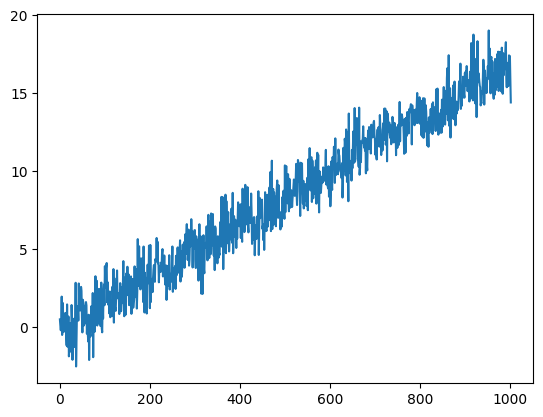

<Figure size 1000x600 with 0 Axes>

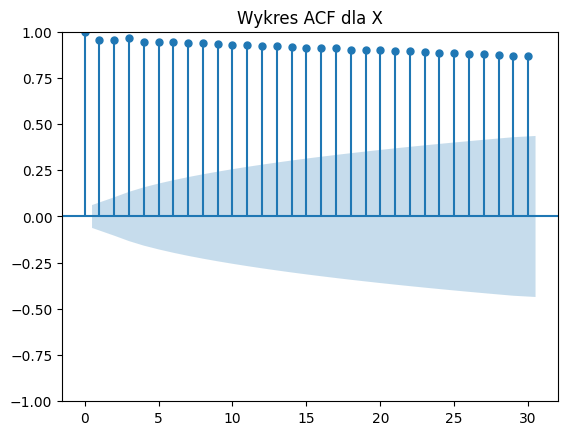

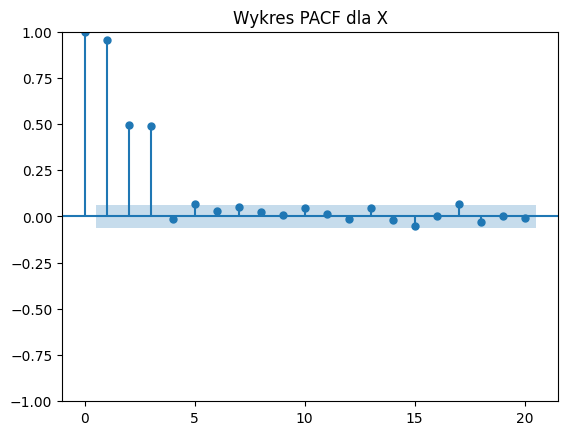

In [399]:
X = [0.5, 0.1, -0.2]
eps = []

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.01 * (i + 1) + 0.4 * X[-3] + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('Wykres ACF dla X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('Wykres PACF dla X')
plt.show()

### Important note!
Our time series does not meet the conditions of stationarity, so we need to transform it into a stationary form:

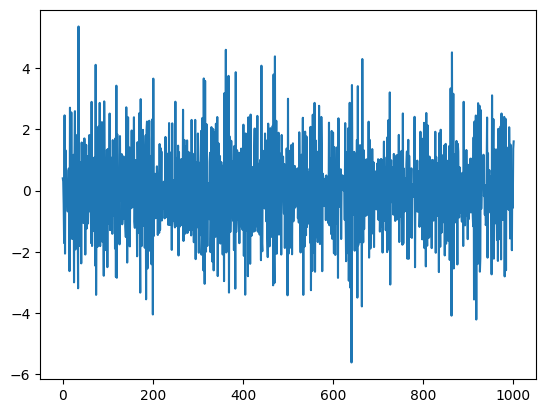

In [400]:
Y = np.array(X[:-1]) - np.array(X[1:])
plt.plot(Y)
plt.show()


### Let's verify mathematically whether the time series X and Y are stationary:

We use ADF (Augmented Dickey-Fuller) tests, which are designed to assess the stationarity of a time series.

It tests the following hypotheses:

+ H₀ (null hypothesis): the series is not stationary (contains a unit root, i.e., has a trend).

+ H₁ (alternative hypothesis): the series is stationary.

By analyzing the test statistic and the corresponding p-value, we can determine whether to reject the null hypothesis and conclude that the series is stationary.

In [401]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(X)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.6599506212993667
p-value: 0.8568523596173009


$p-value > alfa = 0.05$

We accept the null hypothesis $H_{0}$ - The series is not stationary

In [402]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Y)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.016669765891969
p-value: 3.090910244411075e-22


$p-value < alfa = 0.05$

We reject the null hypothesis $H_{0}$ - The series is stationary

### Real data example:

This is a meteorological dataset collected from a single weather station, containing 60 daily measurements. It includes parameters such as minimum, maximum, and average temperature, wind speed, and precipitation levels. The data can be used for climate analysis, weather forecasting, and time series modeling of atmospheric phenomena.

Link: https://rafalraczynski.com.pl/imgw-archiwum/

         data  Tmin[C]  Tmax[C]  Tsr[C]  vmin[km/h]  vmax[km/h]  vsr[km/h]  \
0  2024-07-01     14.5     19.3    16.9         1.0        18.1        9.6   
1  2024-07-02     18.7     25.0    21.8         1.8        25.8       13.8   
2  2024-07-03     19.2     23.6    21.4         0.4        20.7       10.5   
3  2024-07-04     12.1     19.6    15.8         1.5        25.0       13.2   
4  2024-07-05     15.8     22.3    19.0         2.2        15.4        8.8   

   opad[mm]  
0       7.2  
1       9.7  
2       6.6  
3       0.0  
4       9.7  
          data  Tmin[C]  Tmax[C]  Tsr[C]  vmin[km/h]  vmax[km/h]  vsr[km/h]  \
56  2024-08-26     18.4     26.0    22.2         2.0        29.4       15.7   
57  2024-08-27     19.1     27.0    23.0         0.0        20.1       10.0   
58  2024-08-28     21.7     26.7    24.2         1.4        27.0       14.2   
59  2024-08-29     18.8     25.1    22.0         2.3        27.0       14.6   
60  2024-08-30     12.9     20.1    16.5         1.5

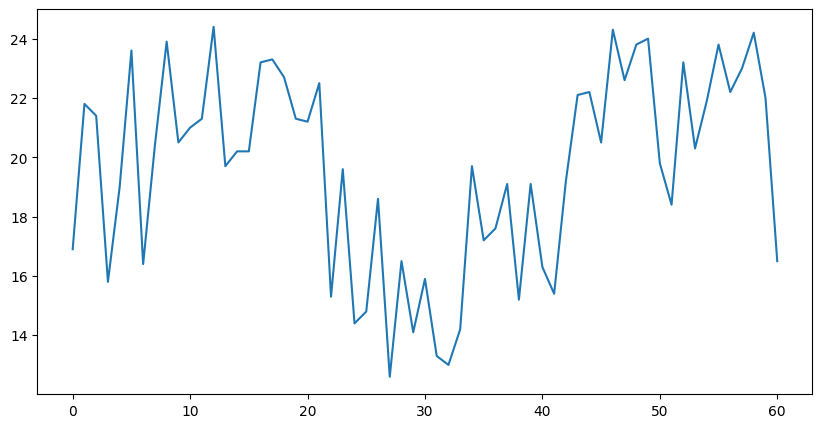

In [403]:
df = pd.read_csv("meteorological/krk.txt", sep=r"\s+")

print(df.head())
print(df.tail())

# Our goal is the column of average temperature
X = df["Tsr[C]"]

# Plot of temperature
fig = plt.figure(figsize=(10, 5))
X.plot()
plt.show()

### Let's verify mathematically whether the time series X is stationary:

In [404]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(X)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('alfa value: 10% -> 0.1')

ADF Statistic: -2.732505617938323
p-value: 0.06858029368400918
alfa value: 10% -> 0.1


$p-value < alfa = 0.1$

We reject the null hypothesis $H_{0}$ - The series is stationary

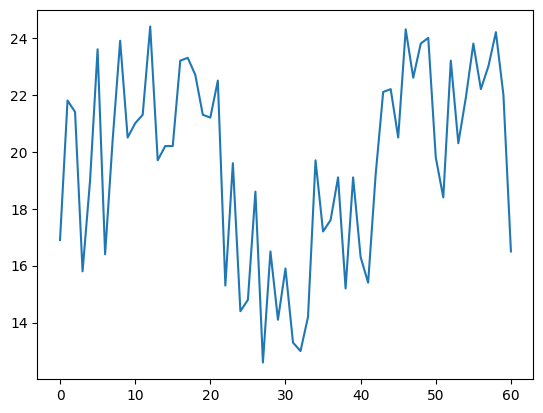

<Figure size 1000x600 with 0 Axes>

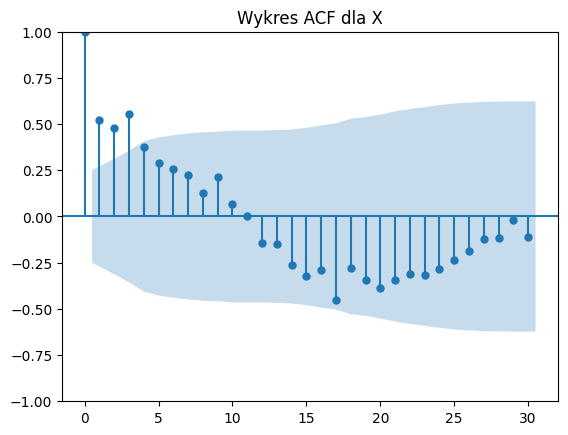

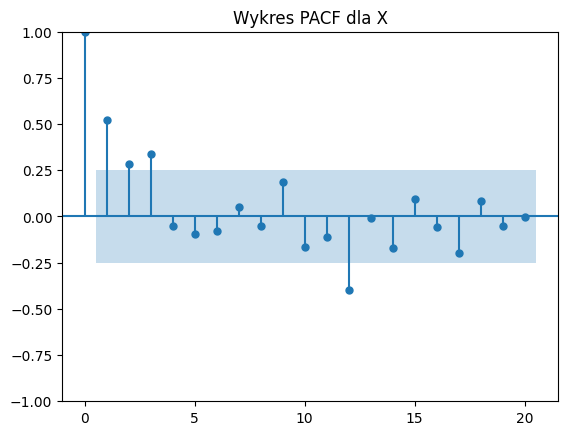

In [405]:
plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('Wykres ACF dla X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('Wykres PACF dla X')
plt.show()

In [406]:
data = pd.Series(X.to_numpy())

model_arma = ARIMA(data, order=(2, 0, 2))  # ARIMA(p=2, d=0, q=2)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -143.789
Date:                Thu, 19 Jun 2025   AIC                            299.578
Time:                        19:26:29   BIC                            312.244
Sample:                             0   HQIC                           304.542
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5167      0.878     22.235      0.000      17.796      21.237
ar.L1          1.1557      0.265      4.365      0.000       0.637       1.675
ar.L2         -0.4278      0.234     -1.825      0.0

In [407]:
forecast_object = model_arma_fit.get_forecast(steps=3)
forecast = forecast_object.predicted_mean
print(forecast)

conf_int = forecast_object.conf_int()
print(conf_int)

61    20.045437
62    17.813139
63    17.321762
Name: predicted_mean, dtype: float64
      lower y    upper y
61  15.096446  24.994428
62  12.817356  22.808922
63  11.781852  22.861673
